#Dataset 1

##Reading Dataset

In [45]:
import pandas as pd
df = pd.read_csv('processed_dataset.csv')
df

Unnamed: 0      Airline    Source Destination  Price Day_of_Week  day  \
0               0       IndiGo  Banglore   New Delhi   3897      Sunday   24   
1               1    Air India   Kolkata    Banglore   7662   Wednesday    1   
2               2  Jet Airways     Delhi      Cochin  13882      Sunday    9   
3               3       IndiGo   Kolkata    Banglore   6218      Sunday   12   
4               4       IndiGo  Banglore   New Delhi  13302      Friday    1   
...           ...          ...       ...         ...    ...         ...  ...   
10678       10678     Air Asia   Kolkata    Banglore   4107     Tuesday    9   
10679       10679    Air India   Kolkata    Banglore   4145    Saturday   27   
10680       10680  Jet Airways  Banglore       Delhi   7229    Saturday   27   
10681       10681      Vistara  Banglore   New Delhi  12648      Friday    1   
10682       10682    Air India     Delhi      Cochin  11753    Thursday    9   

       month  year  Season  Duration_in_minutes  total_stops  
0          3  2019  Spring                  170          0.0  
1          5  2019  Spring                  445          2.0  
2          6  2019  Summer                 1140          2.0  
3          5  2019  Spring                  325          1.0  
4          3  2019  Spring                  285          1.0  
...      ...   ...     ...                  ...          ...  
10678      4  2019  Spring                  150          0.0  
10679      4  2019  Spring                  155          0.0  
10680      4  2019  Spring                  180          0.0  
10681      3  2019  Spring                  160          0.0  
10682      5  2019  Spring                  500          2.0  

[10683 rows x 12 columns]

In [46]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [47]:
df.info()   #columns and there data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  object 
 1   Source               10683 non-null  object 
 2   Destination          10683 non-null  object 
 3   Price                10683 non-null  int64  
 4   Day_of_Week          10683 non-null  object 
 5   day                  10683 non-null  int64  
 6   month                10683 non-null  int64  
 7   year                 10683 non-null  int64  
 8   Season               10683 non-null  object 
 9   Duration_in_minutes  10683 non-null  int64  
 10  total_stops          10682 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 918.2+ KB


In [48]:
df.columns


Index(['Airline', 'Source', 'Destination', 'Price', 'Day_of_Week', 'day',
       'month', 'year', 'Season', 'Duration_in_minutes', 'total_stops'],
      dtype='object')

In [49]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Price                  0
Day_of_Week            0
day                    0
month                  0
year                   0
Season                 0
Duration_in_minutes    0
total_stops            1
dtype: int64

In [50]:
df.dropna(inplace=True)


In [51]:
unique_values = df['Source'].unique()

print(unique_values)

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [52]:
unique_values1 = df['Destination'].unique()

print(unique_values1)

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [53]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# Lists of source and destination cities
source_list = ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
destination_list = ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

# Initialize the geolocator
geolocator = Nominatim(user_agent="city_distance_calculator")

# Function to calculate distance between source and destination
def calculate_distance(source, destination):
    source_location = geolocator.geocode(source + ', India')
    destination_location = geolocator.geocode(destination + ', India')
    
    if source_location is not None and destination_location is not None:
        distance = geodesic((source_location.latitude, source_location.longitude), 
                            (destination_location.latitude, destination_location.longitude)).kilometers
        return distance
    else:
        return None

# Create a list to store the distances
distances = []

# Calculate distances for each combination of source and destination
for source in source_list:
    for destination in destination_list:
        distance = calculate_distance(source, destination)
        distances.append({'Source': source, 'Destination': destination, 'Distance': distance})

# Create a DataFrame from the distances list
df2 = pd.DataFrame(distances)

print(df2)


      Source Destination     Distance
0   Banglore   New Delhi  1733.705461
1   Banglore    Banglore     0.000000
2   Banglore      Cochin   360.523168
3   Banglore     Kolkata  1562.399645
4   Banglore       Delhi  1735.285777
5   Banglore   Hyderabad   496.925194
6    Kolkata   New Delhi  1304.222525
7    Kolkata    Banglore  1562.399645
8    Kolkata      Cochin  1901.269316
9    Kolkata     Kolkata     0.000000
10   Kolkata       Delhi  1308.144157
11   Kolkata   Hyderabad  1184.543217
12     Delhi   New Delhi     3.943417
13     Delhi    Banglore  1735.285777
14     Delhi      Cochin  2067.985155
15     Delhi     Kolkata  1308.144157
16     Delhi       Delhi     0.000000
17     Delhi   Hyderabad  1254.847315
18   Chennai   New Delhi  1748.515819
19   Chennai    Banglore   294.599818
20   Chennai      Cochin   558.161985
21   Chennai     Kolkata  1355.300874
22   Chennai       Delhi  1750.688589
23   Chennai   Hyderabad   511.055118
24    Mumbai   New Delhi  1157.015137
25    Mumbai

In [54]:
import pandas as pd


df =df
df2 =df2

# Create a dictionary mapping (source, destination) to distance
distance_dict = {(row['Source'], row['Destination']): row['Distance'] for index, row in df2.iterrows()}

# Update the 'distance' column in df based on the dictionary
df['Distance'] = [distance_dict.get((source, dest), None) for source, dest in zip(df['Source'], df['Destination'])]

# Display the updated df
print(df)


           Airline    Source Destination  Price Day_of_Week  day  month  year  \
0           IndiGo  Banglore   New Delhi   3897      Sunday   24      3  2019   
1        Air India   Kolkata    Banglore   7662   Wednesday    1      5  2019   
2      Jet Airways     Delhi      Cochin  13882      Sunday    9      6  2019   
3           IndiGo   Kolkata    Banglore   6218      Sunday   12      5  2019   
4           IndiGo  Banglore   New Delhi  13302      Friday    1      3  2019   
...            ...       ...         ...    ...         ...  ...    ...   ...   
10678     Air Asia   Kolkata    Banglore   4107     Tuesday    9      4  2019   
10679    Air India   Kolkata    Banglore   4145    Saturday   27      4  2019   
10680  Jet Airways  Banglore       Delhi   7229    Saturday   27      4  2019   
10681      Vistara  Banglore   New Delhi  12648      Friday    1      3  2019   
10682    Air India     Delhi      Cochin  11753    Thursday    9      5  2019   

       Season  Duration_in_

In [55]:
import pandas as pd

# Assuming 'df' is the DataFrame containing the 'Destination' column
df['Destination'] = 'd_' + df['Destination'].astype(str)

# If the 'Destination' column contains numerical values, you may need to convert them to strings first using .astype(str)


Large, long-haul aircraft (e.g., Boeing 747, Airbus A380): Approximately 2.5 to 3.5 liters of fuel per passenger per kilometer.

Medium-sized, single-aisle aircraft (e.g., Boeing 737, Airbus A320): Approximately 3.5 to 4.5 liters of fuel per passenger per kilometer.

Smaller regional jets and turboprops: The fuel consumption can be higher, ranging from 4 to 6 liters of fuel per passenger per kilometer.

In [56]:

# Create a new column "Fuel" which is 3.5 times the value of "Distance"
df['Fuel'] = df['Distance'] * 3.5

print(df)


           Airline    Source  Destination  Price Day_of_Week  day  month  \
0           IndiGo  Banglore  d_New Delhi   3897      Sunday   24      3   
1        Air India   Kolkata   d_Banglore   7662   Wednesday    1      5   
2      Jet Airways     Delhi     d_Cochin  13882      Sunday    9      6   
3           IndiGo   Kolkata   d_Banglore   6218      Sunday   12      5   
4           IndiGo  Banglore  d_New Delhi  13302      Friday    1      3   
...            ...       ...          ...    ...         ...  ...    ...   
10678     Air Asia   Kolkata   d_Banglore   4107     Tuesday    9      4   
10679    Air India   Kolkata   d_Banglore   4145    Saturday   27      4   
10680  Jet Airways  Banglore      d_Delhi   7229    Saturday   27      4   
10681      Vistara  Banglore  d_New Delhi  12648      Friday    1      3   
10682    Air India     Delhi     d_Cochin  11753    Thursday    9      5   

       year  Season  Duration_in_minutes  total_stops     Distance  \
0      2019  Spri

In [57]:
df = pd.get_dummies(df, prefix="", prefix_sep="")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              10682 non-null  int64  
 1   day                                10682 non-null  int64  
 2   month                              10682 non-null  int64  
 3   year                               10682 non-null  int64  
 4   Duration_in_minutes                10682 non-null  int64  
 5   total_stops                        10682 non-null  float64
 6   Distance                           10682 non-null  float64
 7   Fuel                               10682 non-null  float64
 8   Air Asia                           10682 non-null  uint8  
 9   Air India                          10682 non-null  uint8  
 10  GoAir                              10682 non-null  uint8  
 11  IndiGo                             10682 non-null  uin

##Corelation Heatmap

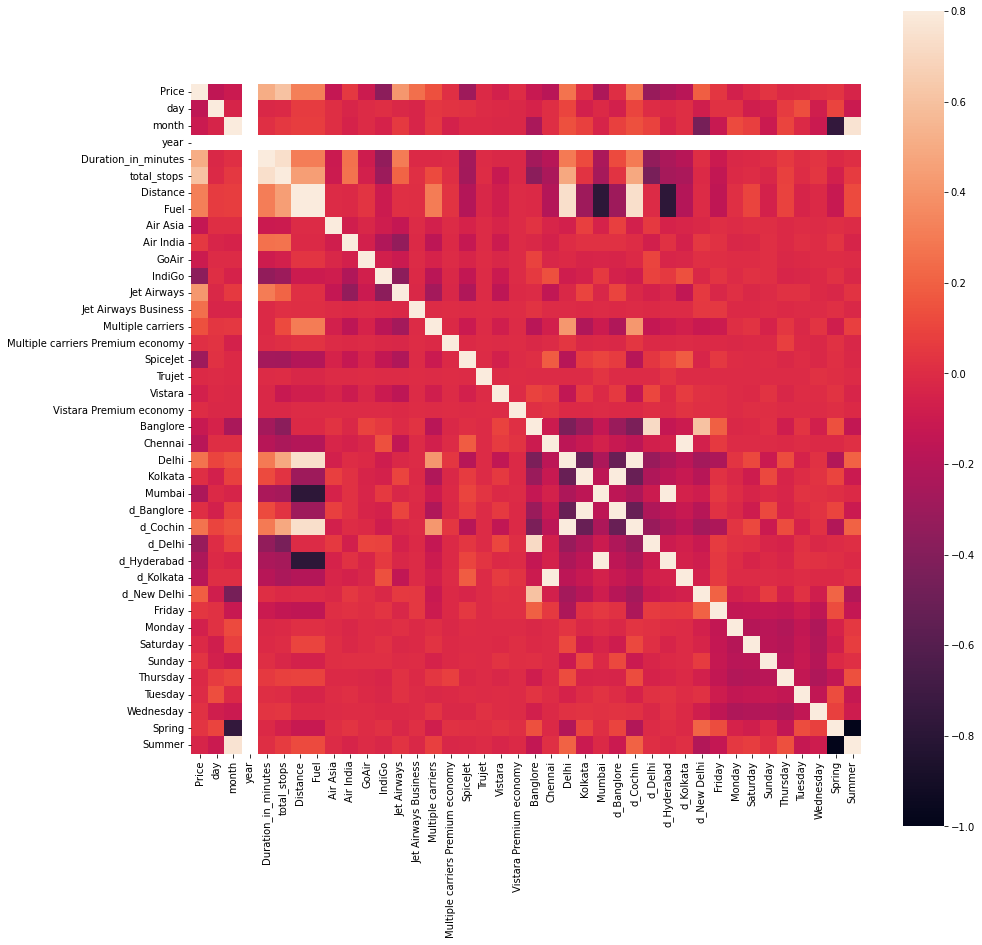

In [59]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              10682 non-null  int64  
 1   day                                10682 non-null  int64  
 2   month                              10682 non-null  int64  
 3   year                               10682 non-null  int64  
 4   Duration_in_minutes                10682 non-null  int64  
 5   total_stops                        10682 non-null  float64
 6   Distance                           10682 non-null  float64
 7   Fuel                               10682 non-null  float64
 8   Air Asia                           10682 non-null  uint8  
 9   Air India                          10682 non-null  uint8  
 10  GoAir                              10682 non-null  uint8  
 11  IndiGo                             10682 non-null  uin

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#a=df

In [63]:
df.columns

Index(['Price', 'day', 'month', 'year', 'Duration_in_minutes', 'total_stops',
       'Distance', 'Fuel', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'd_Banglore', 'd_Cochin', 'd_Delhi', 'd_Hyderabad',
       'd_Kolkata', 'd_New Delhi', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'Summer'],
      dtype='object')

In [64]:
df.columns

Index(['Price', 'day', 'month', 'year', 'Duration_in_minutes', 'total_stops',
       'Distance', 'Fuel', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'd_Banglore', 'd_Cochin', 'd_Delhi', 'd_Hyderabad',
       'd_Kolkata', 'd_New Delhi', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'Summer'],
      dtype='object')

In [65]:
b = df['Price']
#a = df.drop('Yield', axis = 1)



In [66]:
c=df.drop('Price', axis = 1)

In [67]:
len(c.columns)

39

In [68]:
c.columns

Index(['day', 'month', 'year', 'Duration_in_minutes', 'total_stops',
       'Distance', 'Fuel', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'd_Banglore', 'd_Cochin', 'd_Delhi', 'd_Hyderabad',
       'd_Kolkata', 'd_New Delhi', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'Summer'],
      dtype='object')

In [69]:
features_list=['day', 'month', 'year', 'Duration_in_minutes', 'total_stops',
       'Distance', 'Fuel', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'd_Banglore', 'd_Cochin', 'd_Delhi', 'd_Hyderabad',
       'd_Kolkata', 'd_New Delhi', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'Summer']

In [70]:
#features_list = list(set(features_list))

In [71]:
#features_list

In [72]:
len(features_list)

39

In [73]:
features_list123=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]

len(features_list123)

39

In [74]:
len(features_list)

39

In [75]:
a=df[features_list]

In [76]:
a.head()

day  month  year  Duration_in_minutes  total_stops     Distance  \
0   24      3  2019                  170          0.0  1733.705461   
1    1      5  2019                  445          2.0  1562.399645   
2    9      6  2019                 1140          2.0  2067.985155   
3   12      5  2019                  325          1.0  1562.399645   
4    1      3  2019                  285          1.0  1733.705461   

          Fuel  Air Asia  Air India  GoAir  ...  d_New Delhi  Friday  Monday  \
0  6067.969113         0          0      0  ...            1       0       0   
1  5468.398757         0          1      0  ...            0       0       0   
2  7237.948041         0          0      0  ...            0       0       0   
3  5468.398757         0          0      0  ...            0       0       0   
4  6067.969113         0          0      0  ...            1       1       0   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  Spring  Summer  
0         0       1         0        0          0       1       0  
1         0       0         0        0          1       1       0  
2         0       1         0        0          0       0       1  
3         0       1         0        0          0       1       0  
4         0       0         0        0          0       1       0  

[5 rows x 39 columns]

In [77]:
a.columns

Index(['day', 'month', 'year', 'Duration_in_minutes', 'total_stops',
       'Distance', 'Fuel', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'd_Banglore', 'd_Cochin', 'd_Delhi', 'd_Hyderabad',
       'd_Kolkata', 'd_New Delhi', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Spring', 'Summer'],
      dtype='object')

In [78]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

      day  month  year  Duration_in_minutes  total_stops     Distance  \
749    27      6  2019                   90          0.0   623.422170   
6077   21      6  2019                  150          0.0  1562.399645   
2373   27      5  2019                  630          1.0  2067.985155   
2442    9      5  2019                  720          1.0  1562.399645   
5402    9      6  2019                 1410          2.0  2067.985155   
...   ...    ...   ...                  ...          ...          ...   
5734   27      3  2019                 1165          1.0  2067.985155   
5191    9      5  2019                  400          1.0  1562.399645   
5390   15      5  2019                  760          1.0  2067.985155   
860     3      3  2019                  165          0.0  1733.705461   
7270    1      6  2019                  925          1.0  2067.985155   

             Fuel  Air Asia  Air India  GoAir  ...  d_New Delhi  Friday  \
749   2181.977596         0          0      0  .

In [79]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [80]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#a_train = sc.fit_transform(a_train)
#a_test = sc.transform(a_test)

###Random Forest Regressor

In [81]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=1000, random_state=45, n_estimators=10)
   regr.fit(a_train, b_train)
   b_pred = regr.predict(a_test)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(b_pred, b_test))
   print('MAE =', mae(b_pred, b_test))
   print('R2 Score =', r2_score(b_pred, b_test))

MSE = 5606493.207446149
MAE = 1404.4318947478246
R2 Score = 0.7007569171248467


###Polynomial Support Vector Machine

In [82]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(a_train,b_train)
pred=regressorpoly.predict(a_test)
print(regressorpoly.score(a_test,b_test))
print(r2_score(b_test,b_pred))

0.041905607373856735
0.7251843838735919


In [83]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
XGBModel = XGBRegressor()
XGBModel.fit(a_train,b_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(a_test)
MAE = mean_absolute_error(b_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
XGBpredictions

XGBoost validation MAE =  1290.3595391950444


array([15819.284 ,  6786.5264,  7906.4717, ...,  5886.822 ,  3175.0637,
        6945.831 ], dtype=float32)

In [84]:
print(r2_score(b_test , XGBpredictions))

0.7903488267798403


In [85]:
import joblib  #XGBModel
 
# Save the model as a pickle in a file
joblib.dump(XGBModel, 'flight_price.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('flight_price.pkl')
 
# Use the loaded model to make predictions


In [86]:
b_test[0:10]

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
9894    10529
346     16079
6365     7229
7624    10844
3393    16289
Name: Price, dtype: int64

In [87]:
a_test[0:1].values

array([[2.10000000e+01, 5.00000000e+00, 2.01900000e+03, 6.25000000e+02,
        2.00000000e+00, 2.06798515e+03, 7.23794804e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [89]:
# Create a list of new data points
#new_data = [[45., 33., 35.,  6.,  5.,  0.,  0.,  1., 38.,  0.,  0.,  0.]]

new_data =[[23.0, 21.0, 23.0, 6.0, 5.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0,23.0, 21.0, 23.0, 6.0, 5.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0,23.0, 21.0, 23.0, 6.0, 5.0, 1.0, 0.0, 1.0, 3.0, 0.0,0,0,0,0,0]]

# Convert the list of data points to a numpy array
new_data_np = np.array(new_data)

# Use the XGBoost model to make predictions on the new data
predictions = knn_from_joblib.predict((new_data_np))

print(predictions)

[13290.144]
